Lab 3-Feature detection and matching


In [ ]:
!pip install opencv-python matplotlib


DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\lib\site-packages\bs4-0.0.2-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\lib\site-packages\lxml-5.3.0-py3.13-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\lib\site-packages\narwhals-1.19.0-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\l

Function 1 – Harris Corner Detector


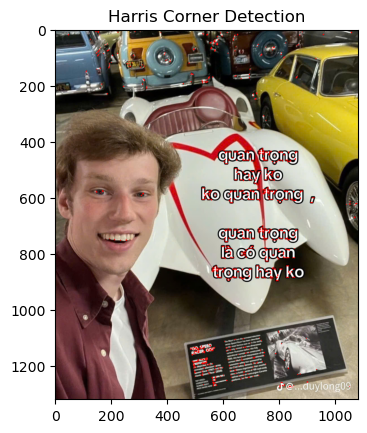

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load ảnh xám
img = cv2.imread(
    r'E:\MSE\HomeWork\Ky 2\IVP501\Test\Lab 3\a4bd8ba62a9c9fc2c68d9.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

# Harris Corner Detection
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)

# Đánh dấu các góc trên ảnh
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Hiển thị
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.show()


Function 2 – Histogram of Oriented Gradients (HOG)


HOG feature vector shape: (72576000,)


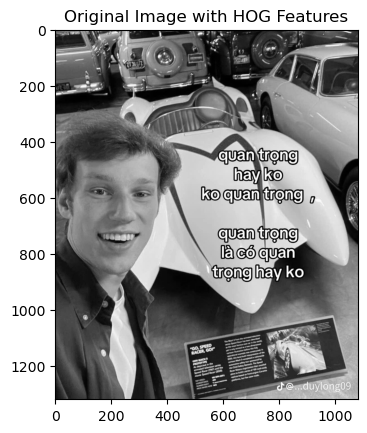

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load ảnh xám
img = cv2.imread(
    r'E:\MSE\HomeWork\Ky 2\IVP501\Test\Lab 3\a4bd8ba62a9c9fc2c68d9.jpg', cv2.IMREAD_GRAYSCALE)

# Tạo đối tượng HOGDescriptor
hog = cv2.HOGDescriptor()
h = hog.compute(img)

print("HOG feature vector shape:", h.shape)

# Hiển thị ảnh gốc
plt.imshow(img, cmap='gray')
plt.title('Original Image with HOG Features')
plt.show()


Function 3: Canny Edge Detection


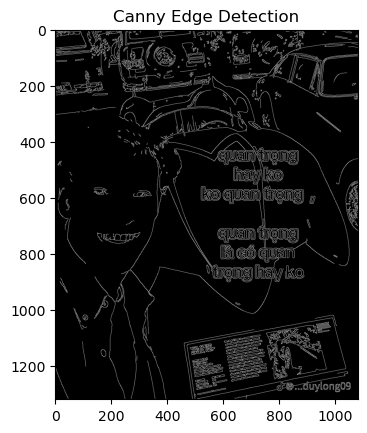

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load ảnh xám
img = cv2.imread(
    r'E:\MSE\HomeWork\Ky 2\IVP501\Test\Lab 3\a4bd8ba62a9c9fc2c68d9.jpg', cv2.IMREAD_GRAYSCALE)

# Canny Edge Detector
edges = cv2.Canny(img, threshold1=100, threshold2=200)

# Hiển thị
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()


Function 4: Hough Line Transform (Rectangle Detection)


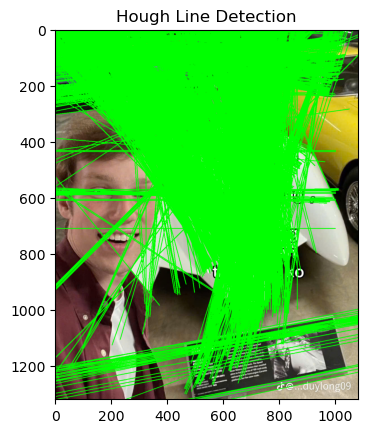

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load ảnh xám
img = cv2.imread(
    r'E:\MSE\HomeWork\Ky 2\IVP501\Test\Lab 3\a4bd8ba62a9c9fc2c68d9.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Hough Line Detection
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

# Vẽ các đường
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Hiển thị kết quả
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Hough Line Detection')
plt.show()
